## **Part I: Building a Basic NN**

In [236]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

**Step 1: Loading the Dataset**

In [237]:
# Load data from csv file
df = pd.read_csv(r"/content/dataset.csv")
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [238]:
# Printing statistics of data
df.describe().loc[['count','mean','std','min','max']].T

,count,mean,std,min,max
f3,766.0,69.118799,19.376901,0.0,122.0
target,766.0,0.349869,0.477240,0.0,1.0


**Step 2: Preprocessing the Dataset**

In [239]:
# Finding unique value in column f1
df['f1'].unique()

array(['6', '1', '8', '0', '5', '3', '10', '2', '4', '7', '9', '11', '13',
       '15', '17', '12', '14', 'c'], dtype=object)

In [240]:
# Selecting the rows with character "c"
df[df['f1']=='c']

,f1,f2,f3,f4,f5,f6,f7,target
764,c,121,72,23,112,26.2,0.245,0


In [241]:
# Finding unique value in column f2
df['f2'].unique()

array(['148', '85', '183', '89', '137', '116', '78', '115', '197', '125',
       '110', '168', '139', '189', '166', '100', '118', '107', '103',
       '126', '99', '196', '119', '143', '147', '97', '145', '117', '109',
       '158', '88', '92', '122', '138', '102', '90', '111', '180', '133',
       '106', '171', '159', '146', '71', '105', '101', '176', '150', '73',
       '187', '84', '44', '141', '114', '95', '129', '79', '0', '62',
       '131', '112', '113', '74', '83', '136', '80', '123', '81', '134',
       '142', '144', '93', '163', '151', '96', '155', '76', '160', '124',
       '162', '132', '120', '173', '170', '128', '108', '154', '57',
       '156', '153', '188', '152', '104', '87', '75', '179', '130', '194',
       '181', '135', '184', '140', '177', '164', '91', '165', '86', '193',
       '191', '161', '167', '77', '182', '157', '178', '61', '98', '127',
       '82', '72', '172', '94', '175', '195', '68', '186', '198', '121',
       '67', '174', '199', '56', '169', '149', '6

In [242]:
# Selecting the rows with character "f"
df[df['f2']=='f']

,f1,f2,f3,f4,f5,f6,f7,target
760,9,f,74,31,0,44,0.403,1


In [243]:
# Finding unique value in column f4
df['f4'].unique()

array(['35', '29', '0', '23', '32', '45', '19', '47', '38', '30', '41',
       '33', '26', '15', '36', '11', '31', '37', '42', '25', '18', '24',
       '39', '27', '21', '34', '10', '60', '13', '20', '22', '28', '54',
       '40', '51', '56', '14', '17', '50', '44', '12', '46', '16', '7',
       '52', '43', '48', '8', '49', '63', '99', 'a'], dtype=object)

In [244]:
# Selecting the rows with character "a"
df[df['f4']=='a']

,f1,f2,f3,f4,f5,f6,f7,target
765,1,126,60,a,0,30.1,0.349,1


In [245]:
# Finding unique value in column f5
df['f5'].unique()

array(['0', '94', '168', '88', '543', '846', '175', '230', '83', '96',
       '235', '146', '115', '140', '110', '245', '54', '192', '207', '70',
       '240', '82', '36', '23', '300', '342', '304', '142', '128', '38',
       '100', '90', '270', '71', '125', '176', '48', '64', '228', '76',
       '220', '40', '152', '18', '135', '495', '37', '51', '99', '145',
       '225', '49', '50', '92', '325', '63', '284', '119', '204', '155',
       '485', '53', '114', '105', '285', '156', '78', '130', '55', '58',
       '160', '210', '318', '44', '190', '280', '87', '271', '129', '120',
       '478', '56', '32', '744', '370', '45', '194', '680', '402', '258',
       '375', '150', '67', '57', '116', '278', '122', '545', '75', '74',
       '182', '360', '215', '184', '42', '132', '148', '180', '205', '85',
       '231', '29', '68', '52', '255', '171', '73', '108', '43', '167',
       '249', '293', '66', '465', '89', '158', '84', '72', '59', '81',
       '196', '415', '275', '165', '579', '310', '6

In [246]:
# Selecting the rows with character "b"
df[df['f5']=='b']

,f1,f2,f3,f4,f5,f6,f7,target
763,2,122,70,27,b,36.8,0.34,0


In [247]:
# Finding unique value in column f6
df['f6'].unique()

array(['33.6', '26.6', '23.3', '28.1', '43.1', '25.6', '31', '35.3',
       '30.5', '0', '37.6', '38', '27.1', '30.1', '25.8', '30', '45.8',
       '29.6', '43.3', '34.6', '39.3', '35.4', '39.8', '29', '36.6',
       '31.1', '39.4', '23.2', '22.2', '34.1', '36', '31.6', '24.8',
       '19.9', '27.6', '24', '33.2', '32.9', '38.2', '37.1', '34', '40.2',
       '22.7', '45.4', '27.4', '42', '29.7', '28', '39.1', '19.4', '24.2',
       '24.4', '33.7', '34.7', '23', '37.7', '46.8', '40.5', '41.5', '25',
       '25.4', '32.8', '32.5', '42.7', '19.6', '28.9', '28.6', '43.4',
       '35.1', '32', '24.7', '32.6', '43.2', '22.4', '29.3', '24.6',
       '48.8', '32.4', '38.5', '26.5', '19.1', '46.7', '23.8', '33.9',
       '20.4', '28.7', '49.7', '39', '26.1', '22.5', '39.6', '29.5',
       '34.3', '37.4', '33.3', '31.2', '28.2', '53.2', '34.2', '26.8',
       '55', '42.9', '34.5', '27.9', '38.3', '21.1', '33.8', '30.8',
       '36.9', '39.5', '27.3', '21.9', '40.6', '47.9', '50', '25.2',
       

In [248]:
# Selecting the rows with character "d"
df[df['f6']=='d']

,f1,f2,f3,f4,f5,f6,f7,target
762,10,101,76,48,180,d,0.171,0


In [249]:
# Finding unique value in column f7
df['f7'].unique()

array(['0.627', '0.351', '0.672', '0.167', '2.288', '0.201', '0.248',
       '0.134', '0.158', '0.232', '0.191', '0.537', '1.441', '0.398',
       '0.587', '0.484', '0.551', '0.254', '0.183', '0.529', '0.704',
       '0.388', '0.451', '0.263', '0.205', '0.257', '0.487', '0.245',
       '0.337', '0.546', '0.851', '0.267', '0.188', '0.512', '0.966',
       '0.42', '0.665', '0.503', '1.39', '0.271', '0.696', '0.235',
       '0.721', '0.294', '1.893', '0.564', '0.586', '0.344', '0.305',
       '0.491', '0.526', '0.342', '0.467', '0.718', '0.962', '1.781',
       '0.173', '0.304', '0.27', '0.699', '0.258', '0.203', '0.855',
       '0.845', '0.334', '0.189', '0.867', '0.411', '0.583', '0.231',
       '0.396', '0.14', '0.391', '0.37', '0.307', '0.102', '0.767',
       '0.237', '0.227', '0.698', '0.178', '0.324', '0.153', '0.165',
       '0.443', '0.261', '0.277', '0.761', '0.255', '0.13', '0.323',
       '0.356', '0.325', '1.222', '0.179', '0.262', '0.283', '0.93',
       '0.801', '0.207', '0

In [250]:
# Selecting the rows with character "e"
df[df['f7']=='e']

,f1,f2,f3,f4,f5,f6,f7,target
761,9,89,62,0,0,22.5,e,0


In [251]:
# dropping rows at index positions 760, 761, 762, 763, 764, 765 to remove the charaters found in earlier steps
df.drop([760, 761, 762, 763, 764, 765], inplace = True)
df.reset_index(drop=True, inplace=True)
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [252]:
# Converting the values to numeric and generating statistics of the dataset
df = df.apply(pd.to_numeric)
df.describe().loc[['count','mean','std','min','max']].T

,count,mean,std,min,max
f1,760.0,3.834211,3.364762,0.000,17.00
f2,760.0,120.969737,32.023301,0.000,199.00
f3,760.0,69.119737,19.446088,0.000,122.00
f4,760.0,20.507895,15.958029,0.000,99.00
f5,760.0,80.234211,115.581444,0.000,846.00
f6,760.0,31.998684,7.899724,0.000,67.10
f7,760.0,0.473250,0.332277,0.078,2.42
target,760.0,0.350000,0.477284,0.000,1.00


**Data Visualization**

<Axes: >

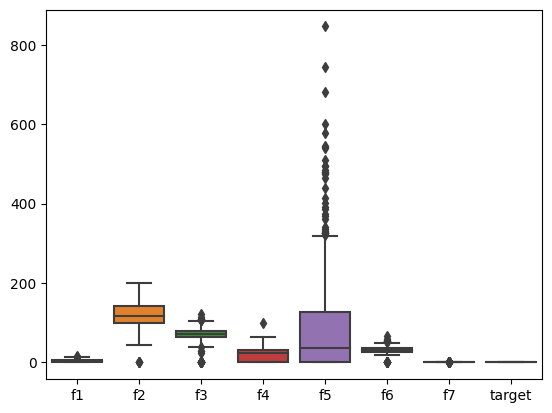

In [253]:
# Boxplot to display the distribution of data points and to view the outliers
sns.boxplot(df)

On seeing the boxplot, we can infer that there are outliers in the dataset. Let us try to remove them. 

In [254]:
import numpy as np

def remove_outliers_zscore(data, threshold=2):
    """
    Remove outliers from data using z-score method
    :param data: array-like input data
    :param threshold: z-score threshold for outlier detection
    :return: data with outliers removed
    """
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return data[z_scores < threshold]
    
# Remove outliers using z-score
clean_data = remove_outliers_zscore(df)

print("Original data size:", len(df))
print("Cleaned data size:", len(clean_data.dropna()))

Original data size: 760
Cleaned data size: 575


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


By removing the outliers, we are loosing 185 records. As the dataset is small, we are proceeding without removing the outliers.

<Axes: >

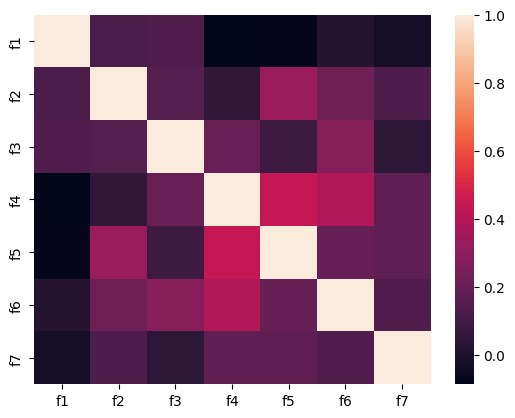

In [255]:
# Heat map to display the correlation between features
df_x = df.drop(['target'], axis = 1)
df_norm = (df_x-df_x.mean())/df_x.std()
sns.heatmap(df_norm.corr())

Correlation heat map does not imply causation, and additional analysis is needed to establish causal relationships between variables.

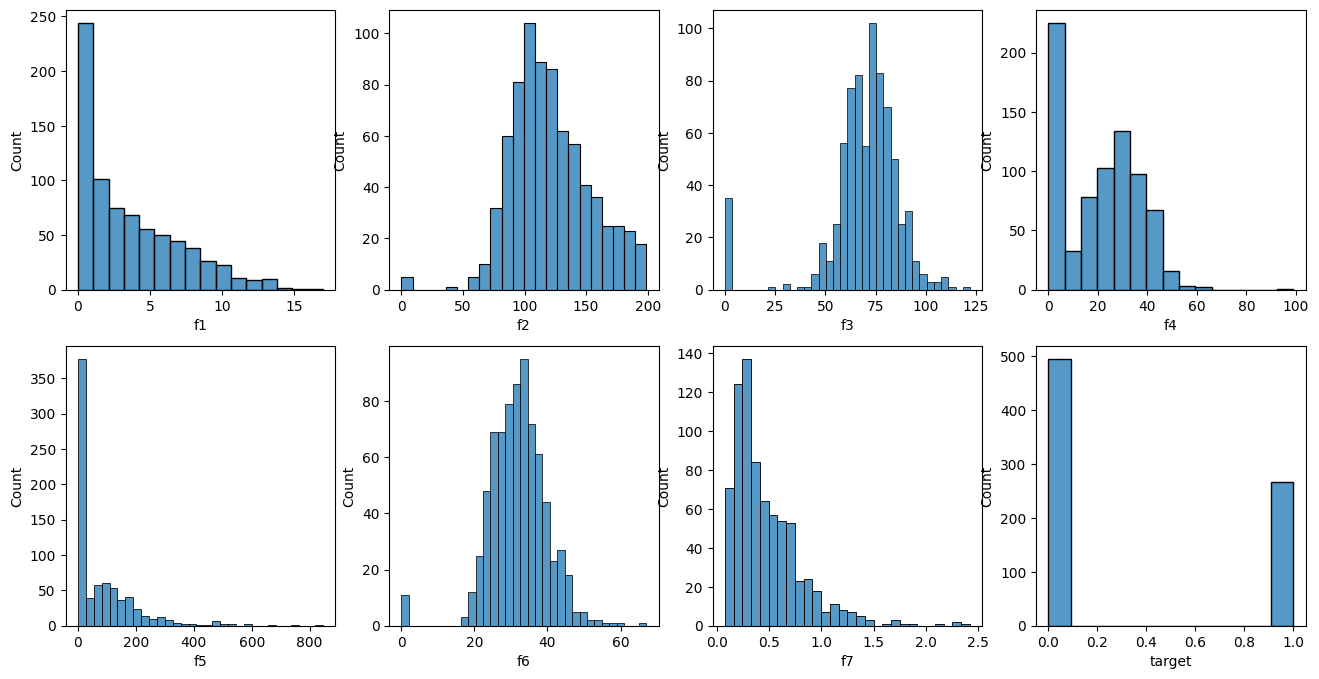

In [256]:
# Histogram to display the distribution of dataset
n_rows=2
n_cols=4
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 8))

for i, column in enumerate(df.columns):
    sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols])

From the histogram we can note that the f1, f4, f5 has more 0 and the f2, f3, f6 are grouped over the center, so the imply good normal distribution.

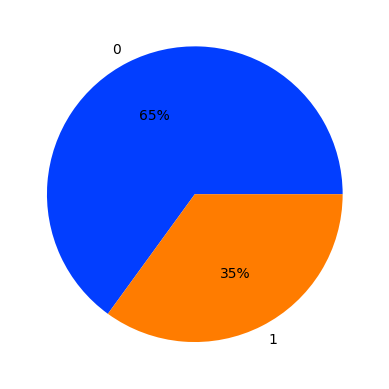

In [257]:
# Pie plot to display the percentage of 0 and 1 of the target variable
count_df = df['target'].value_counts().reset_index()
count_df = count_df.rename(columns={'index': 'class', 'target': 'count'})
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(count_df['count'], labels=count_df['class'], colors=palette_color, autopct='%.0f%%')
plt.show()

From the above graph, it is evident that there is a target imbalance in the dataset.

**Splitting and Scaling Data**

In [258]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)  # Feature matrix
y = df['target']  # Target variable

# Split data into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

# Split training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/.85, random_state=9)

In [259]:
# Scaling the data so that we can improve model convergence, improve performance, 
# prevent features from overshadowing each other and to ensure fairness in model training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [260]:
# Displaying the shape of the trainging data
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(531, 7) (115, 7) (114, 7)
(531,) (115,) (114,)


**Step 3: Defining the Neural Network**

Defining functions to build, train, optimize, validate and test the model

In [261]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.metrics import confusion_matrix, roc_curve, auc
import sklearn.metrics
import time

def build_model(activation_func, dropout, initializer):
    # Defining a NN model
    model = tf.keras.Sequential()
    model.add(Input(shape=(7), name='input_layer'))
    model.add(Dense(128, activation=activation_func, kernel_initializer=initializer, name='dense_layer_1'))
    model.add(Dropout(dropout, name='dropput_layer_1'))
    model.add(Dense(64, activation=activation_func, kernel_initializer=initializer, name='dense_layer_2'))
    model.add(Dropout(dropout, name='dropput_layer_2'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'))
    return model

def train_model(model, x_train, y_train, epochs, batch_size, optimizer, loss_fn, validation_data, learning_rate):
    # Training the NN model
    num_batches = len(x_train) // batch_size
    training_losses = []
    training_accuracies = []
    val_losses = []
    val_accuracies = []
    
    start_time = time.time()
    
    for epoch in range(epochs):
        
        epoch_loss = 0
        epoch_accuracy = 0
        
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            x_batch = x_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            y_batch = np.asarray(y_batch).astype('float32').reshape((-1,1))
            
            loss_value, accuracy, model = optimize(optimizer(learning_rate), loss_fn, x_batch, y_batch, model)
            
            epoch_loss += loss_value
            epoch_accuracy += accuracy
            
        # Calculate average epoch loss and accuracy
        epoch_loss /= num_batches
        epoch_accuracy /= num_batches     
        
        # Evaluate the model on the validation data
        val_loss, val_accuracy = model_validate(model, loss_fn, validation_data[0], validation_data[1])
        
        training_losses.append(epoch_loss)
        training_accuracies.append(epoch_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

    stop_time = time.time()
    elapsed_time = (stop_time - start_time) / 60
    
    # plotting Accuracy vs epochs for training and validation sets
    epochs = [x for x in range(1,epochs + 1)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.set_title(f'Accuracy vs epochs')
    ax1.plot(epochs, training_accuracies, 'b', label='Training accuracy')
    ax1.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # plotting Losses vs epochs for training and validation sets
    ax2.set_title(f'Losses vs epochs')
    ax2.plot(epochs, training_losses, 'b', label='Training losses')
    ax2.plot(epochs, val_losses, 'r', label='Validation losses')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Losses')
    ax2.legend()
    
    plt.show()
    
    return model, elapsed_time

def optimize(optimizer, loss_func, x, y, model):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)

        # Using loss function to computer error between predicted output and true labels
        loss = loss_func(y, logits)           
    gradients = tape.gradient(loss, model.trainable_variables)

    # Using optimizer and learning rate to update the weights of the NN model
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    preds = tf.round(logits)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), tf.float32))
    return loss, accuracy, model

def model_validate(model, loss_func, x_val, y_val):
    # calculate loss
    logits = model(x_val)
    val_loss = loss_func(y_val, logits)
    
    # calculate accuracy
    preds = tf.round(logits)
    val_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y_val), tf.float32))
    
    return val_loss, val_accuracy

# Evaluating the trained model using test data
def model_test(model, loss_func, x_test, y_test):
    
    logits = model(x_test)
    test_loss = loss_func(y_test, logits)
    y_pred = tf.round(logits)
    
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_test), tf.float32))
    
    print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", cm)

    # Create heatmap of confusion matrix
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, logits)
    roc_auc = auc(fpr, tpr)
    
    # Create ROC curve plot
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return test_loss, test_accuracy

In [262]:
# Reshaping the y values and printing the shape of train, validation and test data
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_val = np.asarray(y_val).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
training_data = (X_train, y_train)
validation_data = (X_val, y_val)
test_data = (X_test, y_test)

print(len(training_data), len(validation_data), len(test_data))
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

2 2 2
(531, 7) (531, 1)
(115, 7) (115, 1)
(114, 7) (114, 1)


**Training the NN model**


Training model with dropout: 0.4, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


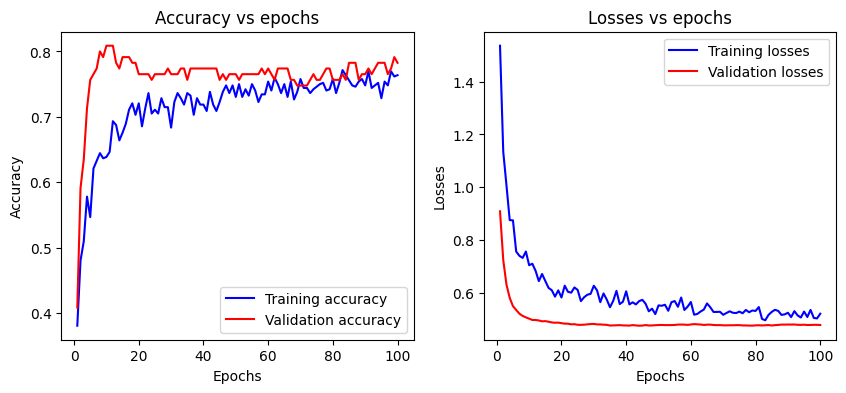

Test loss: 0.41575872898101807, Test accuracy: 0.7982456088066101
Confusion matrix:
 [[73 12]
 [11 18]]


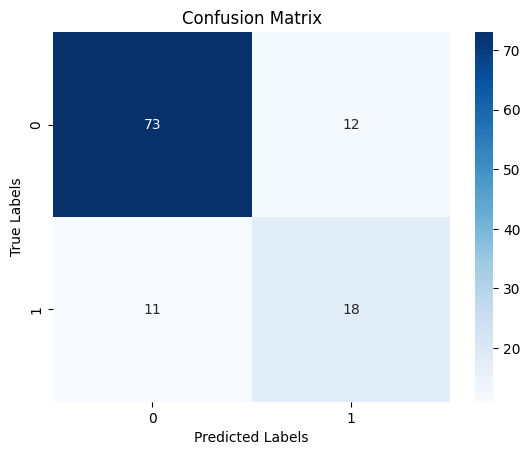

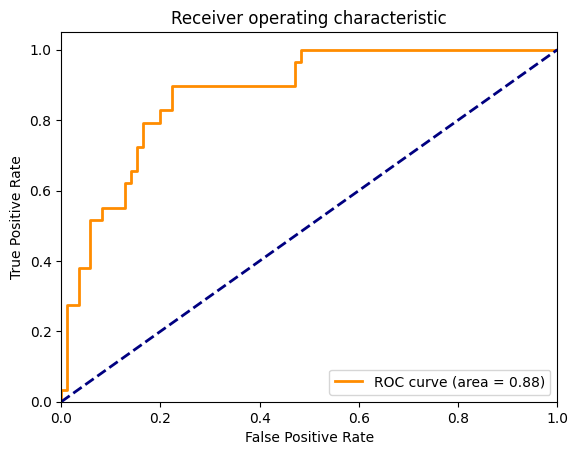

In [263]:
import itertools
dropout_rates = [0.4]
activations = ['LeakyReLU']
learning_rates = [0.01]
initializers = [tf.keras.initializers.HeUniform()]               
optimizers = [tf.keras.optimizers.SGD]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]

trained_model.save("aethiraj_dmohanra_assignment2_part1.h5")

The first graph shows the accuracy vs epoch and loss vs epoch between training and validation dataset.

The second graph shows the confusion matrix of the base model. There are 7 false positives and 14 False negatives.

The third graph is also to visualize the results from the model. It is a ROC-AUC curve that shows that the area under the curve is more, leading to the better performance. The ROC-AUC curve provides a visual representation of the performance of a binary classifier at different decision thresholds, and the AUC score provides a single metric that summarizes the overall performance of the classifier. Here it is 0.89, thus proving the high performance of the model.

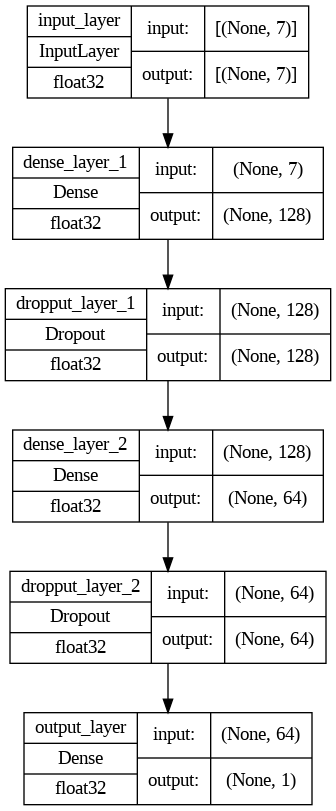

In [264]:
# Architecture diagram of the model
tf.keras.utils.plot_model(
    trained_model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
)

## **Part II: Optimizing NN**

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(



Training model with dropout: 0.1, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


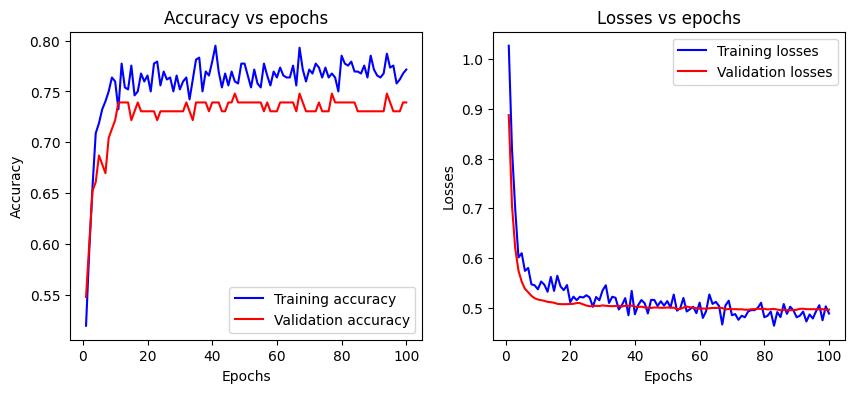

Test loss: 0.42455318570137024, Test accuracy: 0.8070175647735596
Confusion matrix:
 [[72 13]
 [ 9 20]]


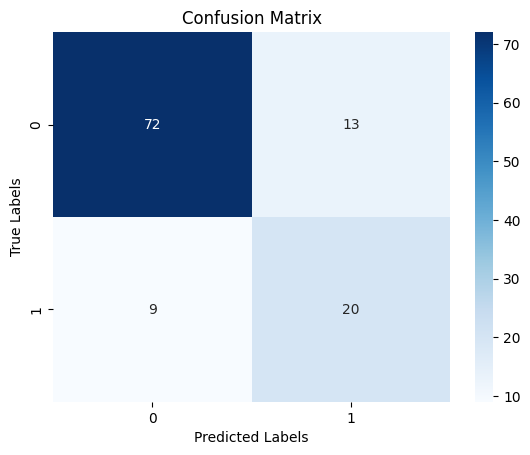

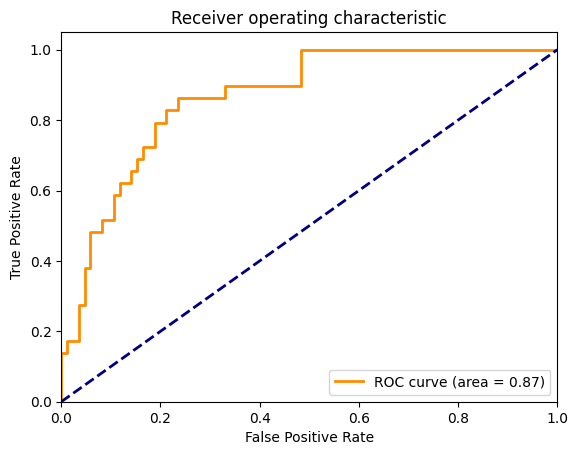


Training model with dropout: 0.2, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


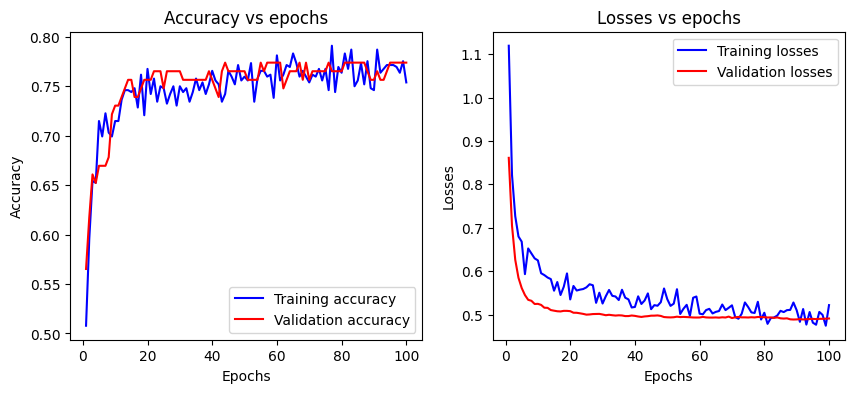

Test loss: 0.4303305745124817, Test accuracy: 0.8157894611358643
Confusion matrix:
 [[71 14]
 [ 7 22]]


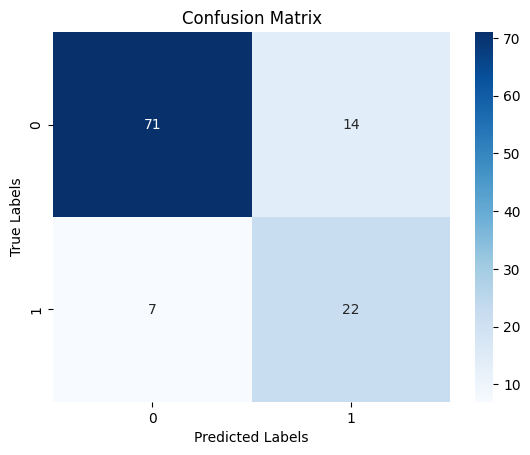

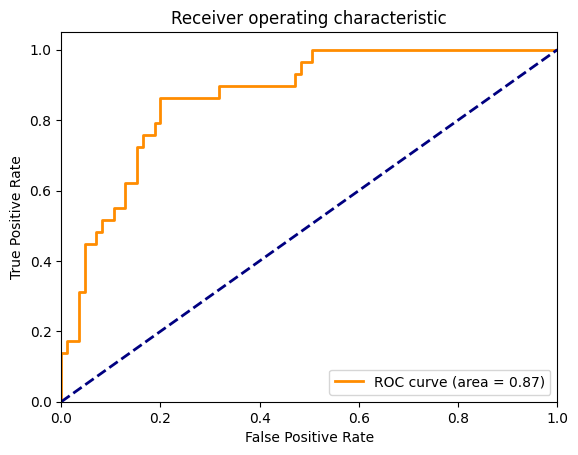


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


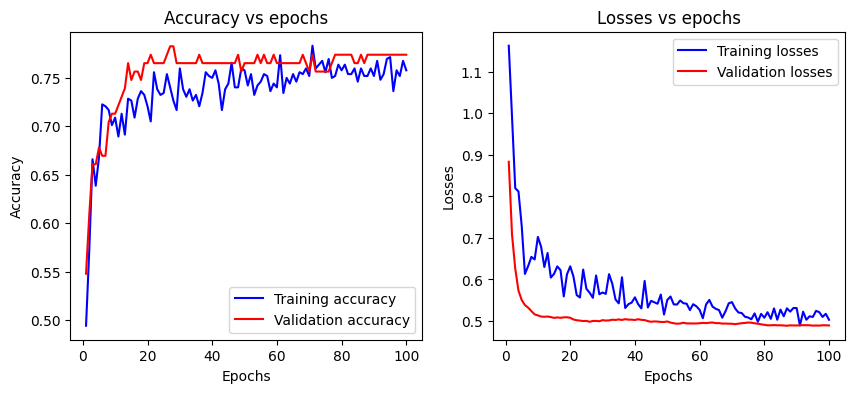

Test loss: 0.4276934862136841, Test accuracy: 0.8333333134651184
Confusion matrix:
 [[72 13]
 [ 6 23]]


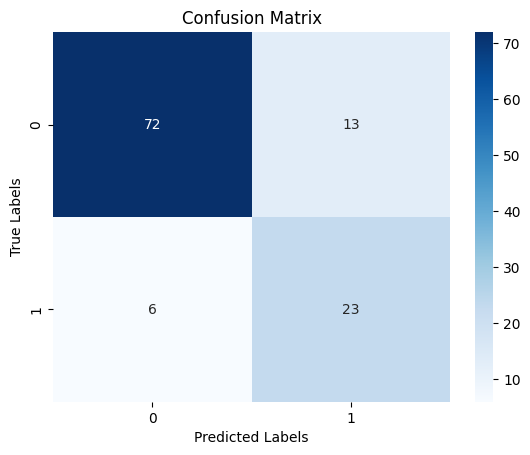

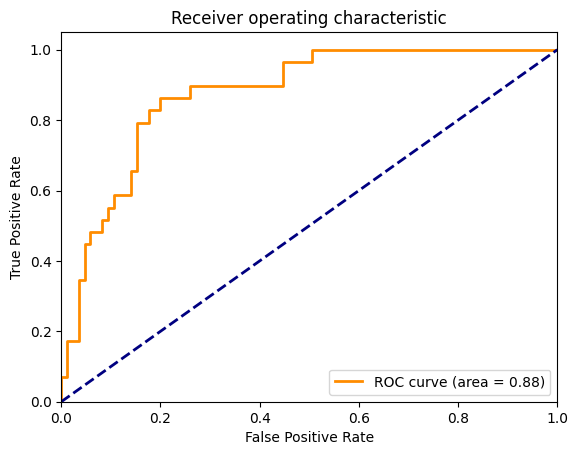

In [265]:
# Here we are changing the dropout of the model and keeping all other hyperparameter constant
dropout_rates = [0.1, 0.2, 0.3]
activations = ['LeakyReLU']
learning_rates = [0.01]
initializers = [tf.keras.initializers.HeUniform()]                 
optimizers = [tf.keras.optimizers.SGD]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: ReLU, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


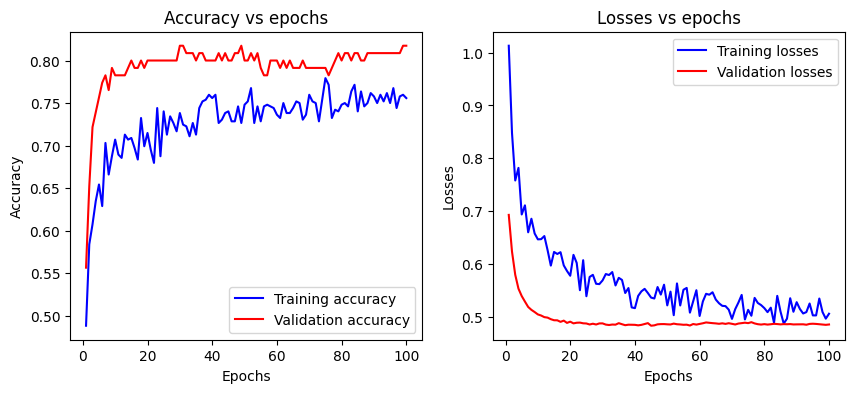

Test loss: 0.44919100403785706, Test accuracy: 0.8245614171028137
Confusion matrix:
 [[72 13]
 [ 7 22]]


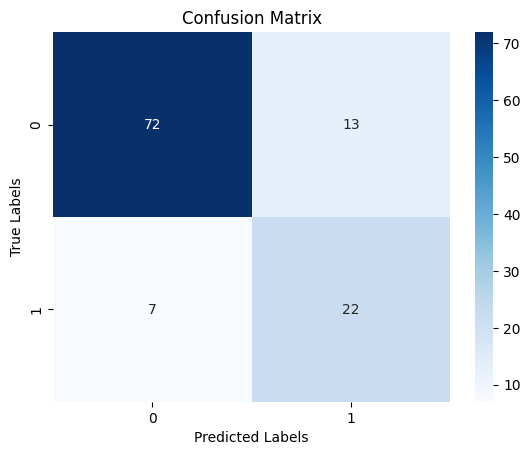

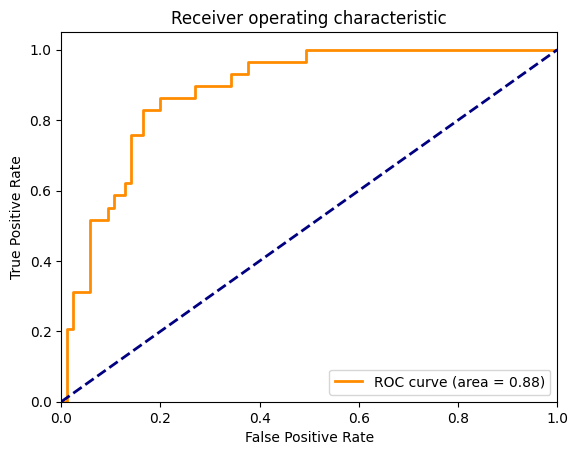


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: tanh, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


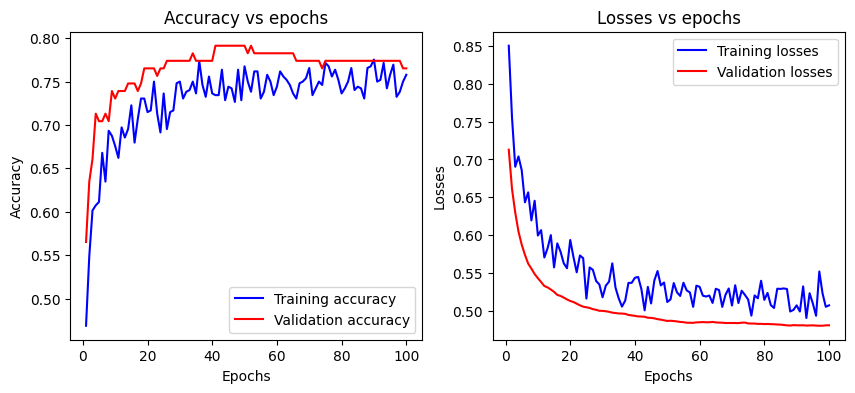

Test loss: 0.40662989020347595, Test accuracy: 0.7719298005104065
Confusion matrix:
 [[70 15]
 [11 18]]


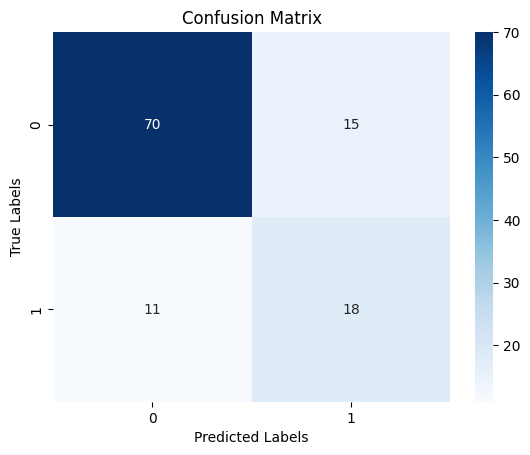

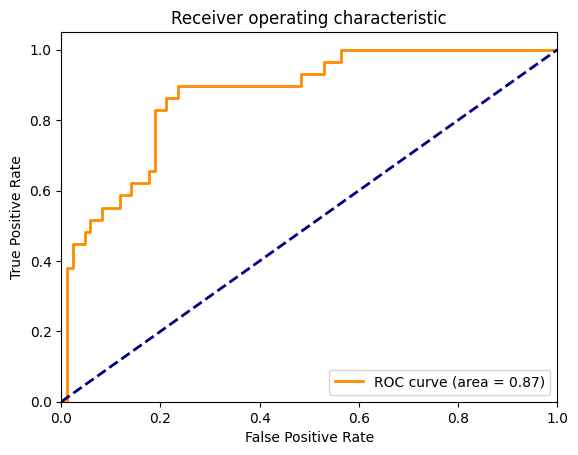


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: elu, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


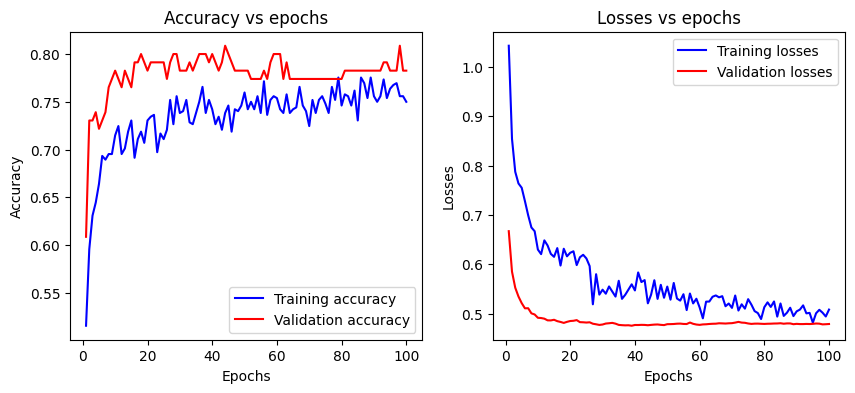

Test loss: 0.423575758934021, Test accuracy: 0.8070175647735596
Confusion matrix:
 [[70 15]
 [ 7 22]]


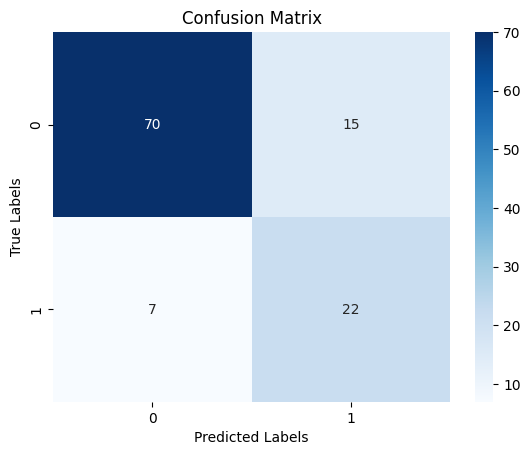

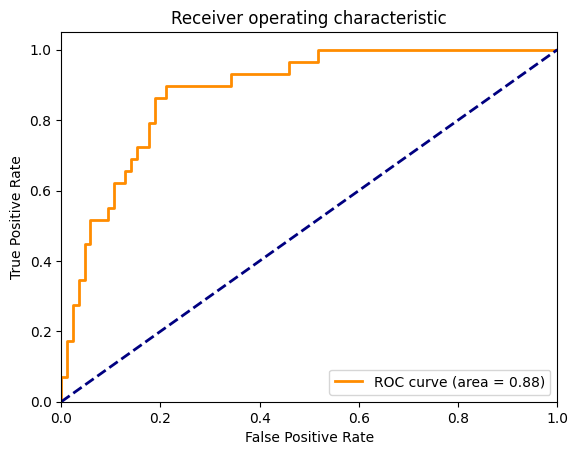

In [266]:
# Here we are changing the activation functions of the model and keeping all other hyperparameter constant
dropout_rates = [0.3]
activations = ['ReLU', 'tanh', 'elu']
learning_rates = [0.01]
initializers = [tf.keras.initializers.HeUniform()]             
optimizers = [tf.keras.optimizers.SGD]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]


Training model with dropout: 0.3, optimizer: Adagrad'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


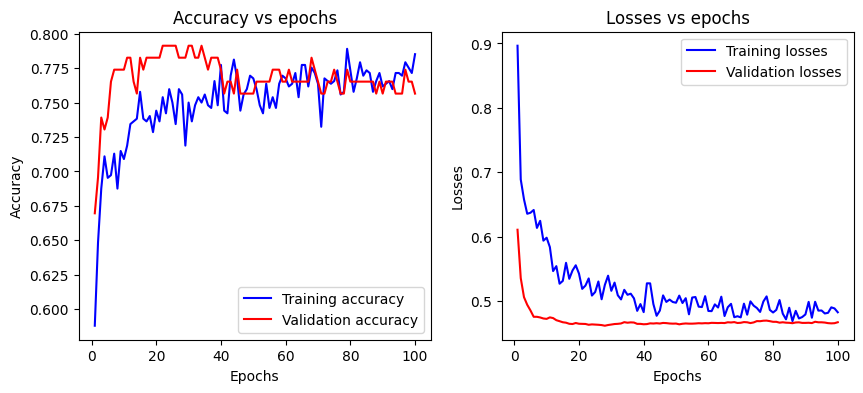

Test loss: 0.40879520773887634, Test accuracy: 0.8070175647735596

Training model with dropout: 0.3, optimizer: Adam'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



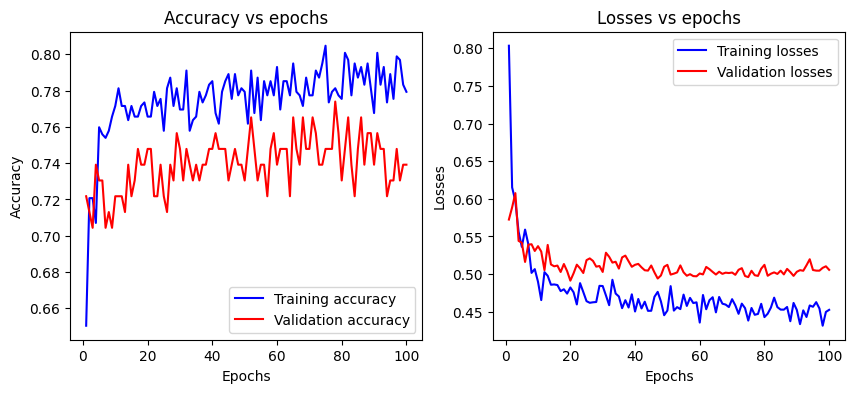

Test loss: 0.42732760310173035, Test accuracy: 0.7982456088066101

Training model with dropout: 0.3, optimizer: RMSprop'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



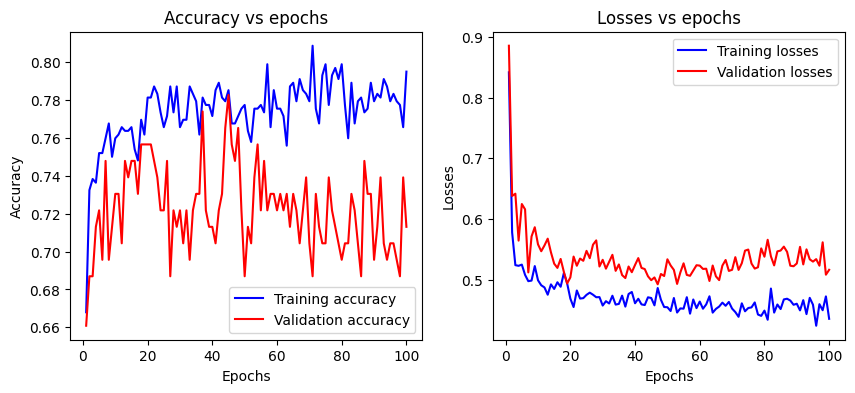

Test loss: 0.4447474181652069, Test accuracy: 0.780701756477356


In [278]:
# Here we are changing the optimizer functions of the model and keeping all other hyperparameter constant
dropout_rates = [0.3]
activations = ['LeakyReLU']
learning_rates = [0.01]
initializers = [tf.keras.initializers.HeUniform()]                
optimizers = [tf.keras.optimizers.Adagrad,tf.keras.optimizers.Adam,
             tf.keras.optimizers.RMSprop]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.001, initializer: HeUniform.



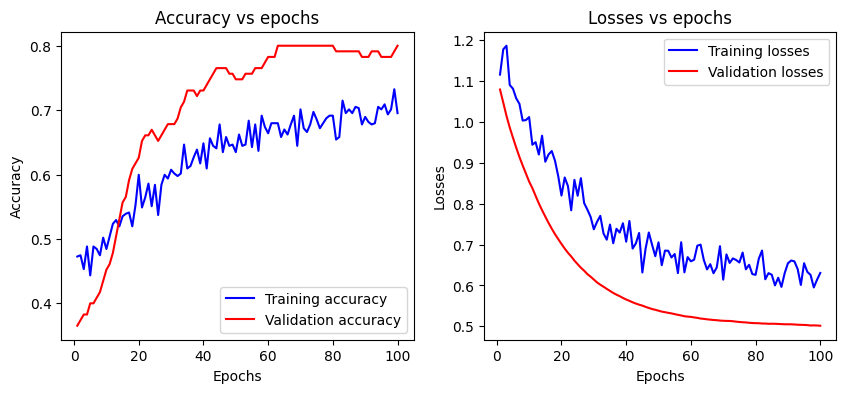

Test loss: 0.5283511877059937, Test accuracy: 0.7982456088066101

Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.0001, initializer: HeUniform.



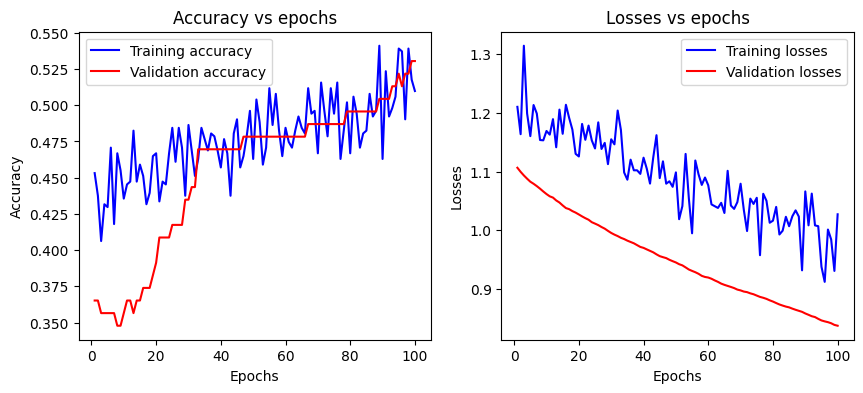

Test loss: 0.8608902096748352, Test accuracy: 0.4649122953414917

Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.0005, initializer: HeUniform.



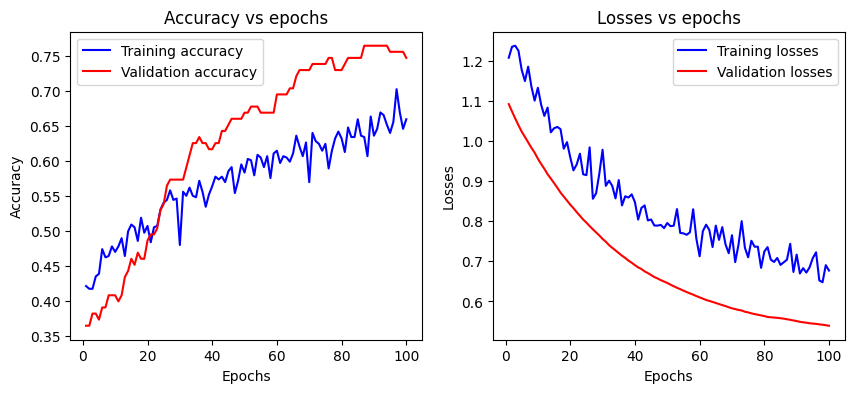

Test loss: 0.5840240716934204, Test accuracy: 0.7280701994895935


In [279]:
# Here we are changing the learning rate of the model and keeping all other hyperparameter constant
dropout_rates = [0.3]
activations = ['LeakyReLU']
learning_rates = [0.001,0.0001,0.0005]
initializers = [tf.keras.initializers.HeUniform()]               
optimizers = [tf.keras.optimizers.SGD]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: GlorotUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


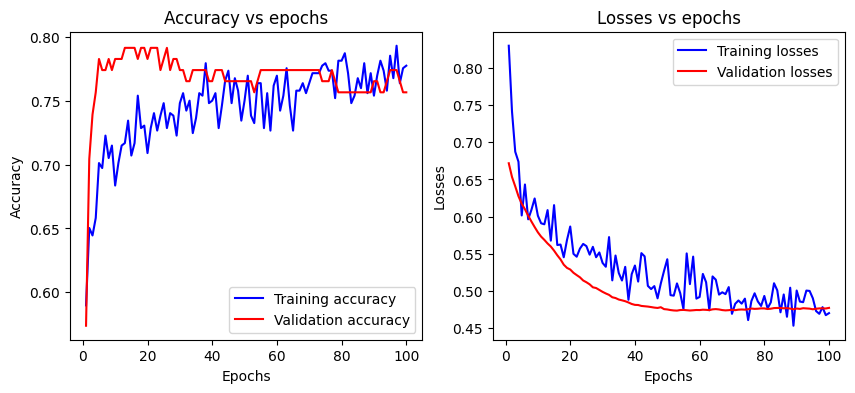

Test loss: 0.43516260385513306, Test accuracy: 0.780701756477356

Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: GlorotNormal.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


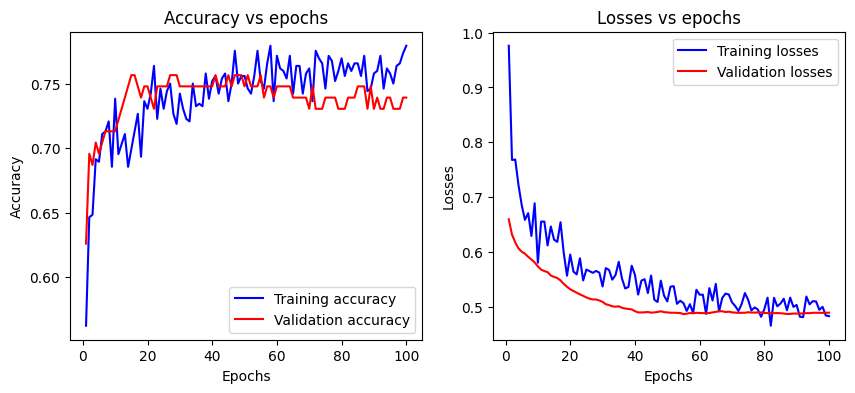

Test loss: 0.4305131137371063, Test accuracy: 0.7982456088066101

Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: RandomNormal.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


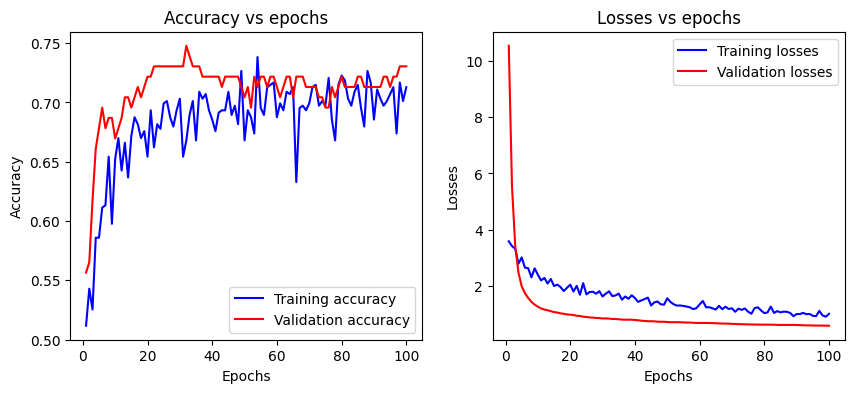

Test loss: 0.5588447451591492, Test accuracy: 0.8157894611358643


In [280]:
# Here we are changing the initializers of the model and keeping all other hyperparameter constant
dropout_rates = [0.3]
activations = ['LeakyReLU']
learning_rates = [0.01]
initializers = [tf.keras.initializers.GlorotUniform(),tf.keras.initializers.GlorotNormal(),
               tf.keras.initializers.RandomNormal(mean=0., stddev=1.)]                 
optimizers = [tf.keras.optimizers.SGD]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]

**Optimization Methods**

**Early Stopping Method**

In [281]:
# Implementing early stopping optimization
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
import sklearn.metrics
import time

# Defining a NN

def build_model(activation_func, dropout, initializer):
    model = tf.keras.Sequential()
    model.add(Input(shape=(7)))
    model.add(Dense(128, activation=activation_func, kernel_initializer=initializer))
    model.add(Dropout(dropout))
    model.add(Dense(64, activation=activation_func, kernel_initializer=initializer))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))
    return model

# Training loop

def train_model(model, x_train, y_train, epochs, batch_size, optimizer, loss_fn, validation_data, learning_rate, earlystopping_metric, patience):

    num_batches = len(x_train) // batch_size
    training_losses = []
    training_accuracies = []
    val_losses = []
    val_accuracies = []
    
    start_time = time.time()
    counter = 0
    for epoch in range(epochs):
        
        epoch_loss = 0
        epoch_accuracy = 0
        
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            x_batch = x_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            y_batch = np.asarray(y_batch).astype('float32').reshape((-1,1))
            
            loss_value, accuracy, model = optimize(optimizer(learning_rate), loss_fn, x_batch, y_batch, model)
            
            epoch_loss += loss_value
            epoch_accuracy += accuracy
            
        # Calculate average epoch loss and accuracy
        epoch_loss /= num_batches
        epoch_accuracy /= num_batches     
        
        # Evaluate the model on the validation data
        val_loss, val_accuracy = model_validate(model, loss_fn, validation_data[0], validation_data[1])
        
        
        # Early stopping implementation
        if earlystopping_metric == 'loss':
            # early stopping on validation loss
            if epoch > 0 and val_loss >= min(val_losses):
                counter += 1
                if counter == patience:
                    print(f'early stopping patience reached {patience}.')
                    break
            else: 
                counter = 0
                    
        elif earlystopping_metric == 'accuracy':
            # early stopping on validation accuracy
            if epoch > 0 and val_accuracy <= max(val_accuracies):
                counter += 1
                if counter == patience:
                    print(f'early stopping patience reached {patience}.')
                    break
            else:
                counter = 0
        
        print(f"Epoch {epoch+1}: training_loss = {epoch_loss}, val_loss = {val_loss}, training_acc = {epoch_accuracy}, \
val_acc = {val_accuracy}")
        
        training_losses.append(epoch_loss)
        training_accuracies.append(epoch_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
    

    stop_time = time.time()
    elapsed_time = (stop_time - start_time) / 60
    
    # plotting Accuracy vs epochs for training and validation sets
    x = [x for x in range(1,len(training_losses) + 1)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.set_title(f'Accuracy vs epochs')
    ax1.plot(x, training_accuracies, 'b', label='Training accuracy')
    ax1.plot(x, val_accuracies, 'r', label='Validation accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # plotting Losses vs epochs for training and validation sets
    ax2.set_title(f'Losses vs epochs')
    ax2.plot(x, training_losses, 'b', label='Training losses')
    ax2.plot(x, val_losses, 'r', label='Validation losses')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Losses')
    ax2.legend()
    
    plt.show()
    
    return model, elapsed_time

def optimize(optimizer, loss_func, x, y, model):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        # Using loss function to computer error between predicted output and true labels
        loss = loss_func(y, logits)           
    gradients = tape.gradient(loss, model.trainable_variables)
    # Using optimizer and learning rate to update the weights of the NN model
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    preds = tf.round(logits)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), tf.float32))
    return loss, accuracy, model

def model_validate(model, loss_func, x_val, y_val):
    # calculate loss
    logits = model(x_val)
    val_loss = loss_func(y_val, logits)
    
    # calc accuracy
    preds = tf.round(logits)
    val_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y_val), tf.float32))
    
    return val_loss, val_accuracy

# Evaluating the trained model using test data
def model_test(model, loss_func, x_test, y_test):
    
    logits = model(x_test)
    test_loss = loss_func(y_test, logits)
    y_pred = tf.round(logits)
    
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_test), tf.float32))
    
    print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))
    
    return test_loss, test_accuracy


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.

Epoch 1: training_loss = 0.9363660216331482, val_loss = 0.755411684513092, training_acc = 0.615234375, val_acc = 0.626086950302124
Epoch 2: training_loss = 0.8073179125785828, val_loss = 0.6660101413726807, training_acc = 0.6484375, val_acc = 0.686956524848938
Epoch 3: training_loss = 0.8022630214691162, val_loss = 0.5975988507270813, training_acc = 0.642578125, val_acc = 0.695652186870575
Epoch 4: training_loss = 0.7276303172111511, val_loss = 0.5587091445922852, training_acc = 0.666015625, val_acc = 0.695652186870575
Epoch 5: training_loss = 0.7086450457572937, val_loss = 0.5322885513305664, training_acc = 0.6953125, val_acc = 0.7043478488922119
Epoch 6: training_loss = 0.7054644823074341, val_loss = 0.5132645964622498, training_acc = 0.693359375, val_acc = 0.7130434513092041
Epoch 7: training_loss = 0.6869240999221802, val_loss = 0.4997932314872741

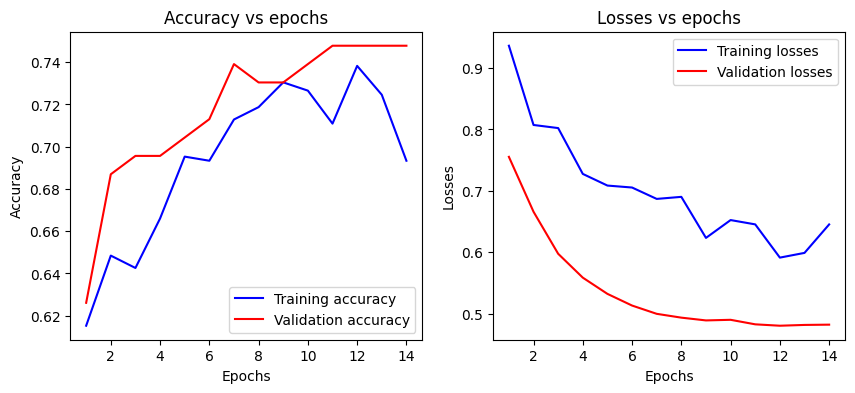

Test loss: 0.41992858052253723, Test accuracy: 0.7982456088066101


In [282]:
# Running the NN model for early stopping
dropout_rates = [0.3]
activations = ['LeakyReLU']
learning_rates = [0.01]
initializers = [tf.keras.initializers.HeUniform()]                 
optimizers = [tf.keras.optimizers.SGD]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate, earlystopping_metric = 'loss', patience = 3)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]

In [283]:
# Printing the tst results of earlystopping model
df

,dropout,optimizer,activation,learning_rate,initializer,test_loss,test_accuracy,train_time
0,0.3,SGD,LeakyReLU,0.01,HeUniform,0.419929,0.798246,0.066915


**Comparing with base model**


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


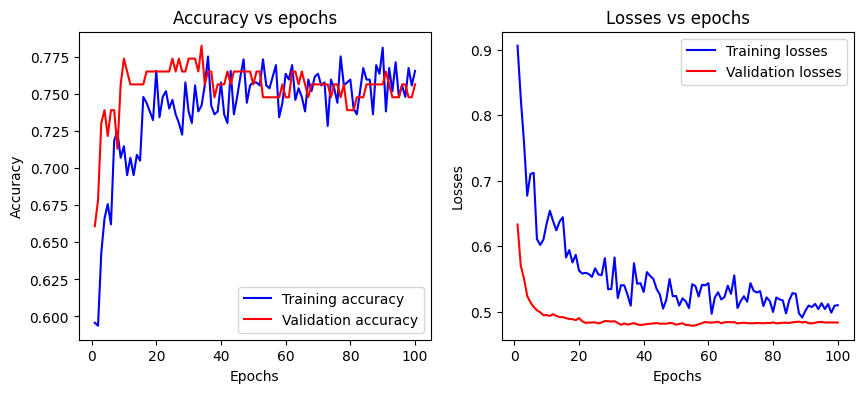

Test loss: 0.4406517744064331, Test accuracy: 0.8157894611358643
   dropout optimizer activation  learning_rate initializer  test_loss  \
0      0.3       SGD  LeakyReLU           0.01   HeUniform   0.440652   

   test_accuracy  train_time  
0       0.815789    0.413429  


In [284]:
# Base Model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
import sklearn.metrics
import time

# Defining a NN

def build_model(activation_func, dropout, initializer):
    model = tf.keras.Sequential()
    model.add(Input(shape=(7)))
    model.add(Dense(128, activation=activation_func, kernel_initializer=initializer))
    model.add(Dropout(dropout))
    model.add(Dense(64, activation=activation_func, kernel_initializer=initializer))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))
    return model

# Training loop

def train_model(model, x_train, y_train, epochs, batch_size, optimizer, loss_fn, validation_data, learning_rate):
    
    num_batches = len(x_train) // batch_size
    training_losses = []
    training_accuracies = []
    val_losses = []
    val_accuracies = []
    
    start_time = time.time()
    
    for epoch in range(epochs):
        
        epoch_loss = 0
        epoch_accuracy = 0
        
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            x_batch = x_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            y_batch = np.asarray(y_batch).astype('float32').reshape((-1,1))
            
            loss_value, accuracy, model = optimize(optimizer(learning_rate), loss_fn, x_batch, y_batch, model)
            
            epoch_loss += loss_value
            epoch_accuracy += accuracy
            
        # Calculate average epoch loss and accuracy
        epoch_loss /= num_batches
        epoch_accuracy /= num_batches     
        
        # Evaluate the model on the validation data
        val_loss, val_accuracy = model_validate(model, loss_fn, validation_data[0], validation_data[1])
        
        training_losses.append(epoch_loss)
        training_accuracies.append(epoch_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

    stop_time = time.time()
    elapsed_time = (stop_time - start_time) / 60
    
    # plotting Accuracy vs epochs for training and validation sets
    epochs = [x for x in range(1,epochs + 1)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.set_title(f'Accuracy vs epochs')
    ax1.plot(epochs, training_accuracies, 'b', label='Training accuracy')
    ax1.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # plotting Losses vs epochs for training and validation sets
    ax2.set_title(f'Losses vs epochs')
    ax2.plot(epochs, training_losses, 'b', label='Training losses')
    ax2.plot(epochs, val_losses, 'r', label='Validation losses')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Losses')
    ax2.legend()
    
    plt.show()
    
    return model, elapsed_time

def optimize(optimizer, loss_func, x, y, model):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        # Using loss function to computer error between predicted output and true labels
        loss = loss_func(y, logits)           
    gradients = tape.gradient(loss, model.trainable_variables)
    # Using optimizer and learning rate to update the weights of the NN model
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    preds = tf.round(logits)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), tf.float32))
    return loss, accuracy, model

def model_validate(model, loss_func, x_val, y_val):
    # calculate loss
    logits = model(x_val)
    val_loss = loss_func(y_val, logits)
    
    # calc accuracy
    preds = tf.round(logits)
    val_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y_val), tf.float32))
    
    return val_loss, val_accuracy

# Evaluating the trained model using test data
def model_test(model, loss_func, x_test, y_test):
    
    logits = model(x_test)
    test_loss = loss_func(y_test, logits)
    y_pred = tf.round(logits)
    
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_test), tf.float32))
    
    print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))
    
    return test_loss, test_accuracy

dropout_rates = [0.3]
activations = ['LeakyReLU']
learning_rates = [0.01]
initializers = [tf.keras.initializers.HeUniform()]                 
optimizers = [tf.keras.optimizers.SGD]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]
print(df)
trained_model.save("aethiraj_dmohanra_assignment2_part2.h5")

In [285]:
# Printing the test results of base model
df

,dropout,optimizer,activation,learning_rate,initializer,test_loss,test_accuracy,train_time
0,0.3,SGD,LeakyReLU,0.01,HeUniform,0.440652,0.815789,0.413429


**Applying K-fold Cross Validation on base model**


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.

fold  0


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


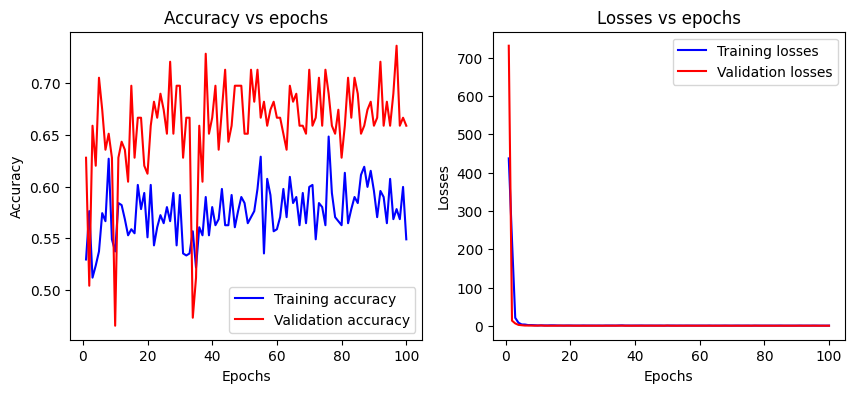

Test loss: 0.6320048570632935, Test accuracy: 0.7456140518188477
   dropout optimizer activation  learning_rate initializer  test_loss  \
0      0.3       SGD  LeakyReLU           0.01   HeUniform   0.632005   

   test_accuracy  train_time  
0       0.745614    0.388016  
fold  1


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


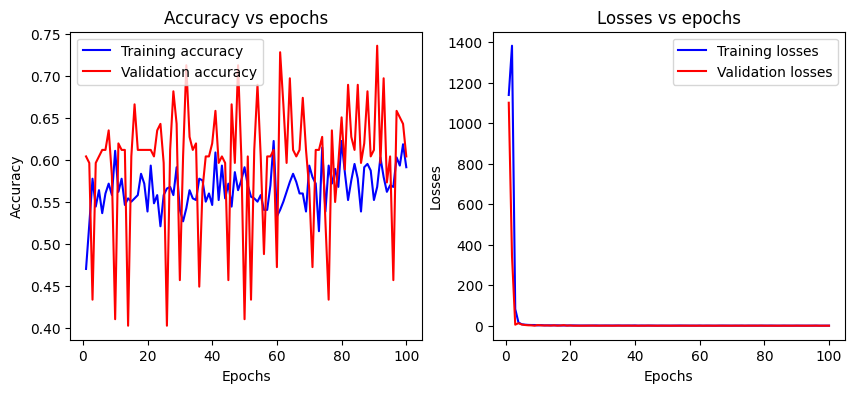

Test loss: 0.6248879432678223, Test accuracy: 0.7456140518188477
   dropout optimizer activation  learning_rate initializer  test_loss  \
0      0.3       SGD  LeakyReLU           0.01   HeUniform   0.632005   
1      0.3       SGD  LeakyReLU           0.01   HeUniform   0.624888   

   test_accuracy  train_time  
0       0.745614    0.388016  
1       0.745614    0.368211  
fold  2


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


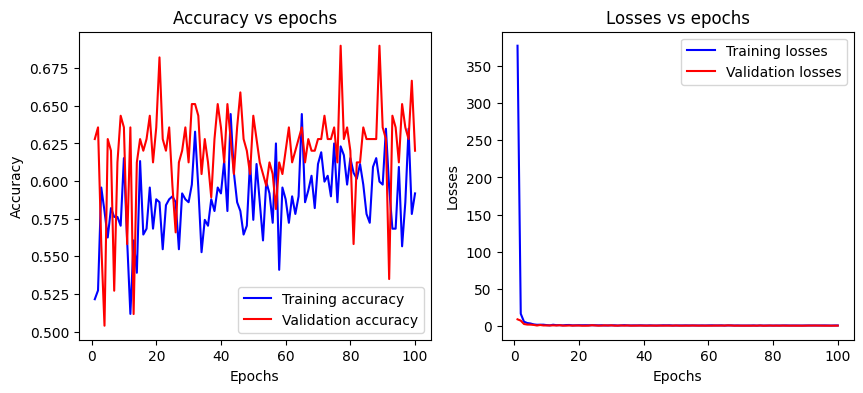

Test loss: 0.6277055144309998, Test accuracy: 0.719298243522644
   dropout optimizer activation  learning_rate initializer  test_loss  \
0      0.3       SGD  LeakyReLU           0.01   HeUniform   0.632005   
1      0.3       SGD  LeakyReLU           0.01   HeUniform   0.624888   
2      0.3       SGD  LeakyReLU           0.01   HeUniform   0.627706   

   test_accuracy  train_time  
0       0.745614    0.388016  
1       0.745614    0.368211  
2       0.719298    0.372161  
fold  3


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


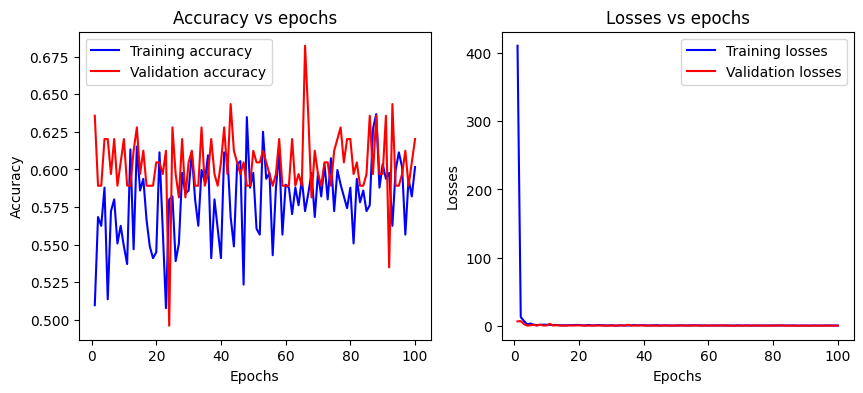

Test loss: 0.6247028708457947, Test accuracy: 0.719298243522644
   dropout optimizer activation  learning_rate initializer  test_loss  \
0      0.3       SGD  LeakyReLU           0.01   HeUniform   0.632005   
1      0.3       SGD  LeakyReLU           0.01   HeUniform   0.624888   
2      0.3       SGD  LeakyReLU           0.01   HeUniform   0.627706   
3      0.3       SGD  LeakyReLU           0.01   HeUniform   0.624703   

   test_accuracy  train_time  
0       0.745614    0.388016  
1       0.745614    0.368211  
2       0.719298    0.372161  
3       0.719298    0.381804  
fold  4


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


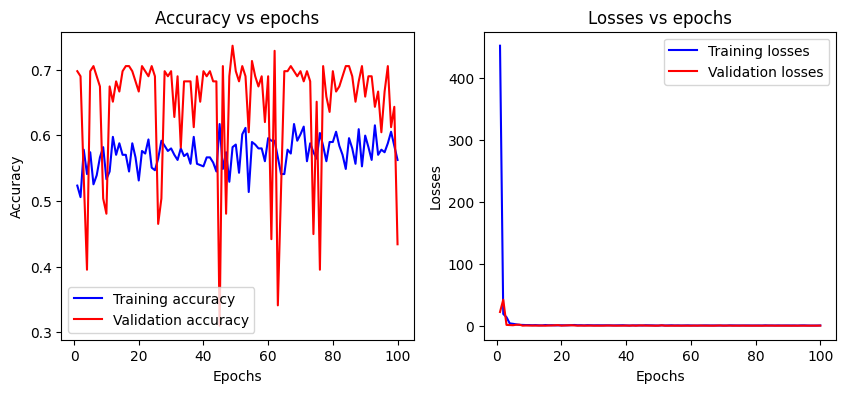

Test loss: 0.613376796245575, Test accuracy: 0.7456140518188477
   dropout optimizer activation  learning_rate initializer  test_loss  \
0      0.3       SGD  LeakyReLU           0.01   HeUniform   0.632005   
1      0.3       SGD  LeakyReLU           0.01   HeUniform   0.624888   
2      0.3       SGD  LeakyReLU           0.01   HeUniform   0.627706   
3      0.3       SGD  LeakyReLU           0.01   HeUniform   0.624703   
4      0.3       SGD  LeakyReLU           0.01   HeUniform   0.613377   

   test_accuracy  train_time  
0       0.745614    0.388016  
1       0.745614    0.368211  
2       0.719298    0.372161  
3       0.719298    0.381804  
4       0.745614    0.375251  
tf.Tensor(0.6245356, shape=(), dtype=float32)
tf.Tensor(0.73508775, shape=(), dtype=float32)


In [286]:
# Implementing k-fold cross validation
dropout_rates = [0.3]
activations = ['LeakyReLU']
learning_rates = [0.01]
initializers = [tf.keras.initializers.HeUniform()]                 
optimizers = [tf.keras.optimizers.SGD]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    k_folds = 5
    
    x_train_kfold=X_train_val.copy()
    y_train_kfold=y_train_val.copy()
    
    x_train_kfold.reset_index(inplace = True, drop = True)
    y_train_kfold.reset_index(inplace = True, drop = True)
    
    # Shuffle data
    indices = np.arange(x_train_kfold.shape[0])
    np.random.shuffle(indices)
    x_train_kfold = x_train_kfold.iloc[indices,:]
    y_train_kfold = y_train_kfold[indices]
    y_train_kfold = np.asarray(y_train_kfold).astype('float32').reshape((-1,1))
    
    # Split data into k folds
    fold_size = len(x_train_kfold) // k_folds
    fold_indices = [(i*fold_size, (i+1)*fold_size) for i in range(k_folds)]
    cum_loss, cum_acc =0 , 0
    for fold in range(k_folds):
        print("fold ", fold)
        # Split data into training and validation sets
        val_start, val_end = fold_indices[fold]
        x_val_kfold = x_train_kfold[val_start:val_end]
        y_val_kfold  = y_train_kfold[val_start:val_end]
        
        x_val_kfold = np.asarray(x_val_kfold).astype('float32')
        y_val_kfold = np.asarray(y_val_kfold).astype('float32').reshape((-1,1))
        
        validation_data_kfold = (x_val_kfold,y_val_kfold)
        x_tr = np.concatenate([x_train_kfold[:val_start], x_train_kfold[val_end:]])
        y_tr = np.concatenate([y_train_kfold[:val_start], y_train_kfold[val_end:]])
        y_tr = np.asarray(y_tr).astype('float32').reshape((-1,1))
    
        model = build_model(activation, dropout_rate, initializer)
        trained_model, train_time = train_model(model, x_tr, y_tr, epochs, batch_size, optimizer, 
                                    loss_func, validation_data_kfold, learning_rate)
        loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
        cum_loss += loss
        cum_acc += accuracy
        results['dropout'].append(dropout_rate)
        results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
        results['activation'].append(activation)
        results['learning_rate'].append(learning_rate)
        results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
        results['test_loss'].append(loss)
        results['test_accuracy'].append(accuracy)
        results['train_time'].append(train_time)
    
        df = pd.DataFrame(results)
        test_loss_list = list(df['test_loss'])
        df['test_loss'] = [t.numpy() for t in test_loss_list]
        test_acc_list = list(df['test_accuracy'])
        df['test_accuracy'] = [t.numpy() for t in test_acc_list]
        print(df)
    cum_loss /= k_folds 
    cum_acc /= k_folds 
    print(cum_loss)
    print(cum_acc)

**Learning rate Scheduler**


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1: learning_rate = 0.01,training_loss = 1.1581934690475464, val_loss = 0.7747662663459778, training_acc = 0.423828125,         val_acc = 0.469565212726593
Epoch 2: learning_rate = 0.01,training_loss = 0.8990819454193115, val_loss = 0.653595507144928, training_acc = 0.544921875,         val_acc = 0.6521739363670349
Epoch 3: learning_rate = 0.01,training_loss = 0.8215051293373108, val_loss = 0.6035914421081543, training_acc = 0.611328125,         val_acc = 0.7217391133308411
Epoch 4: learning_rate = 0.01,training_loss = 0.7534869909286499, val_loss = 0.5725133419036865, training_acc = 0.654296875,         val_acc = 0.730434775352478
Epoch 5: learning_rate = 0.01,training_loss = 0.6900848746299744, val_loss = 0.5533879995346069, training_acc = 0.6796875,         val_acc = 0.730434775352478
Epoch 6: learning_rate = 0.01,training_loss = 0.7321350574493408, val_loss = 0.5404915809631348, training_acc = 0.658203125,         val_acc = 0.730434775352478
Epoch 7: learning_rate = 0.01,train

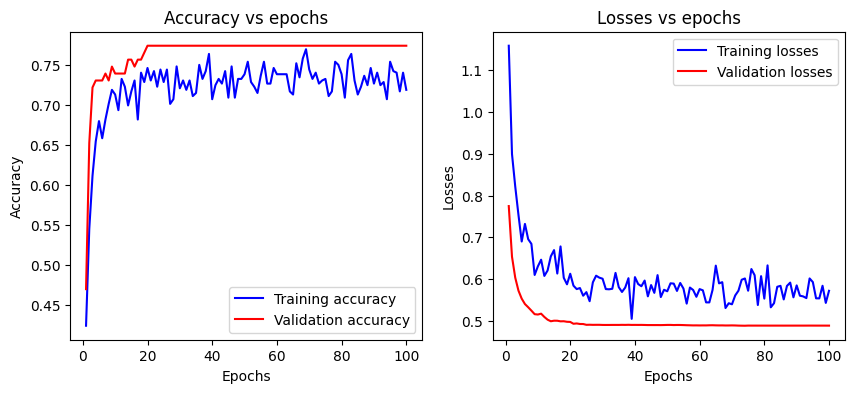

Test loss: 0.41507259011268616, Test accuracy: 0.8070175647735596
   dropout optimizer activation  learning_rate initializer  test_loss  \
0      0.3       SGD  LeakyReLU           0.01   HeUniform   0.415073   

   test_accuracy  train_time  
0       0.807018    0.393657  


In [287]:
# Implementing Learning rate Scheduler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
import sklearn.metrics
import time

# Defining a NN

def build_model(activation_func, dropout, initializer):
    model = tf.keras.Sequential()
    model.add(Input(shape=(7)))
    model.add(Dense(128, activation=activation_func, kernel_initializer=initializer))
    model.add(Dropout(dropout))
    model.add(Dense(64, activation=activation_func, kernel_initializer=initializer))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))
    return model

# Training loop

def train_model(model, x_train, y_train, epochs, batch_size, optimizer, loss_fn, validation_data, learning_rate,lr_schedule):
    
    num_batches = len(x_train) // batch_size
    training_losses = []
    training_accuracies = []
    val_losses = []
    val_accuracies = []
    
    start_time = time.time()
    
    for epoch in range(epochs):
        
        epoch_loss = 0
        epoch_accuracy = 0
        
        # Update learning rate based on schedule
        if epoch in lr_schedule:
            learning_rate *= lr_schedule[epoch]
        
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            x_batch = x_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            y_batch = np.asarray(y_batch).astype('float32').reshape((-1,1))
            
            loss_value, accuracy, model = optimize(optimizer(learning_rate), loss_fn, x_batch, y_batch, model)
            
            epoch_loss += loss_value
            epoch_accuracy += accuracy
            
        # Calculate average epoch loss and accuracy
        epoch_loss /= num_batches
        epoch_accuracy /= num_batches     
        
        # Evaluate the model on the validation data
        val_loss, val_accuracy = model_validate(model, loss_fn, validation_data[0], validation_data[1])
        
        print(f"Epoch {epoch+1}: learning_rate = {learning_rate},training_loss = {epoch_loss}, val_loss = {val_loss}, training_acc = {epoch_accuracy}, \
        val_acc = {val_accuracy}")
        
        training_losses.append(epoch_loss)
        training_accuracies.append(epoch_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

    stop_time = time.time()
    elapsed_time = (stop_time - start_time) / 60
    
    # plotting Accuracy vs epochs for training and validation sets
    epochs = [x for x in range(1,epochs + 1)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.set_title(f'Accuracy vs epochs')
    ax1.plot(epochs, training_accuracies, 'b', label='Training accuracy')
    ax1.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # plotting Losses vs epochs for training and validation sets
    ax2.set_title(f'Losses vs epochs')
    ax2.plot(epochs, training_losses, 'b', label='Training losses')
    ax2.plot(epochs, val_losses, 'r', label='Validation losses')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Losses')
    ax2.legend()
    
    plt.show()
    
    return model, elapsed_time

def optimize(optimizer, loss_func, x, y, model):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        # Using loss function to computer error between predicted output and true labels
        loss = loss_func(y, logits)           
    gradients = tape.gradient(loss, model.trainable_variables)
    # Using optimizer and learning rate to update the weights of the NN model
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    preds = tf.round(logits)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), tf.float32))
    return loss, accuracy, model

def model_validate(model, loss_func, x_val, y_val):
    # calculate loss
    logits = model(x_val)
    val_loss = loss_func(y_val, logits)
    
    # calc accuracy
    preds = tf.round(logits)
    val_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y_val), tf.float32))
    
    return val_loss, val_accuracy

# Evaluating the trained model using test data
def model_test(model, loss_func, x_test, y_test):
    
    logits = model(x_test)
    test_loss = loss_func(y_test, logits)
    y_pred = tf.round(logits)
    
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_test), tf.float32))
    
    print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))
    
    return test_loss, test_accuracy

dropout_rates = [0.3]
activations = ['LeakyReLU']
learning_rates = [0.01]
initializers = [tf.keras.initializers.HeUniform()]                 
optimizers = [tf.keras.optimizers.SGD]
lr_schedule = {25:0.1,75:0.1}

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate,lr_schedule)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]
print(df)

**Batch Normalization**


Training model with dropout: 0.3, optimizer: SGD'>, 
    activation_func: LeakyReLU, 
    learning_rate: 0.01, initializer: HeUniform.



/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


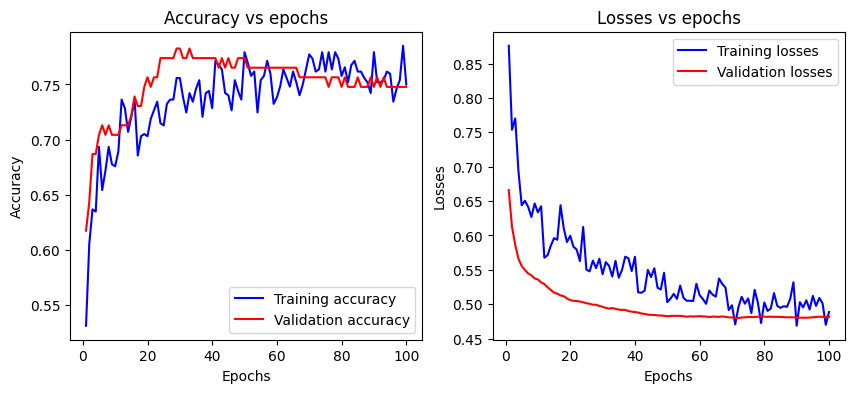

Test loss: 0.43894216418266296, Test accuracy: 0.8157894611358643
   dropout optimizer activation  learning_rate initializer  test_loss  \
0      0.3       SGD  LeakyReLU           0.01   HeUniform   0.438942   

   test_accuracy  train_time  
0       0.815789    0.629395  


In [288]:
# Implementing batch normalization
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
import sklearn.metrics
import time

# Defining a NN

def build_model(activation_func, dropout, initializer):
    model = tf.keras.Sequential()
    model.add(Input(shape=(7)))
    model.add(Dense(128, activation=activation_func, kernel_initializer=initializer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(64, activation=activation_func, kernel_initializer=initializer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))
    return model

# Training loop

def train_model(model, x_train, y_train, epochs, batch_size, optimizer, loss_fn, validation_data, learning_rate):
    
    num_batches = len(x_train) // batch_size
    training_losses = []
    training_accuracies = []
    val_losses = []
    val_accuracies = []
    
    start_time = time.time()
    
    for epoch in range(epochs):
        
        epoch_loss = 0
        epoch_accuracy = 0
        
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            x_batch = x_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            y_batch = np.asarray(y_batch).astype('float32').reshape((-1,1))
            
            loss_value, accuracy, model = optimize(optimizer(learning_rate), loss_fn, x_batch, y_batch, model)
            
            epoch_loss += loss_value
            epoch_accuracy += accuracy
            
        # Calculate average epoch loss and accuracy
        epoch_loss /= num_batches
        epoch_accuracy /= num_batches     
        
        # Evaluate the model on the validation data
        val_loss, val_accuracy = model_validate(model, loss_fn, validation_data[0], validation_data[1])
        
        training_losses.append(epoch_loss)
        training_accuracies.append(epoch_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

    stop_time = time.time()
    elapsed_time = (stop_time - start_time) / 60
    
    # plotting Accuracy vs epochs for training and validation sets
    epochs = [x for x in range(1,epochs + 1)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.set_title(f'Accuracy vs epochs')
    ax1.plot(epochs, training_accuracies, 'b', label='Training accuracy')
    ax1.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # plotting Losses vs epochs for training and validation sets
    ax2.set_title(f'Losses vs epochs')
    ax2.plot(epochs, training_losses, 'b', label='Training losses')
    ax2.plot(epochs, val_losses, 'r', label='Validation losses')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Losses')
    ax2.legend()
    
    plt.show()
    
    return model, elapsed_time

def optimize(optimizer, loss_func, x, y, model):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        # Using loss function to computer error between predicted output and true labels
        loss = loss_func(y, logits)           
    gradients = tape.gradient(loss, model.trainable_variables)
    # Using optimizer and learning rate to update the weights of the NN model
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    preds = tf.round(logits)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), tf.float32))
    return loss, accuracy, model

def model_validate(model, loss_func, x_val, y_val):
    # calculate loss
    logits = model(x_val)
    val_loss = loss_func(y_val, logits)
    
    # calc accuracy
    preds = tf.round(logits)
    val_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y_val), tf.float32))
    
    return val_loss, val_accuracy

# Evaluating the trained model using test data
def model_test(model, loss_func, x_test, y_test):
    
    logits = model(x_test)
    test_loss = loss_func(y_test, logits)
    y_pred = tf.round(logits)
    
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_test), tf.float32))
    
    print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))
    
    return test_loss, test_accuracy

dropout_rates = [0.3]
activations = ['LeakyReLU']
learning_rates = [0.01]
initializers = [tf.keras.initializers.HeUniform()]                 
optimizers = [tf.keras.optimizers.SGD]

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
epochs = 100
batch_size = 64

results = {'dropout': [], 'optimizer': [], 'activation': [], 'learning_rate': [], 'initializer': [],\
           'test_loss': [], 'test_accuracy': [], 'train_time':[]}

for dropout_rate, optimizer, activation, learning_rate, initializer in itertools.product(dropout_rates, optimizers, activations, learning_rates, initializers):
    
    x = f'''\nTraining model with dropout: {dropout_rate}, optimizer: {str(optimizer).split('.')[-1].split(' ')[0]}, 
    activation_func: {activation}, 
    learning_rate: {learning_rate}, initializer: {str(initializer).split('.')[-1].split(' ')[0]}.\n'''
    print(x)
    
    model = build_model(activation, dropout_rate, initializer)
    trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                                loss_func, validation_data, learning_rate)
    loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])
    results['dropout'].append(dropout_rate)
    results['optimizer'].append(str(optimizer).split('.')[-1].split(' ')[0][:-2])
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['initializer'].append(str(initializer).split('.')[-1].split(' ')[0])
    results['test_loss'].append(loss)
    results['test_accuracy'].append(accuracy)
    results['train_time'].append(train_time)
    
df = pd.DataFrame(results)
test_loss_list = list(df['test_loss'])
df['test_loss'] = [t.numpy() for t in test_loss_list]
test_acc_list = list(df['test_accuracy'])
df['test_accuracy'] = [t.numpy() for t in test_acc_list]
print(df)